#Análise exploratória de dados - Banco 'Fictício'

A análise de crédito é um processo utilizado por instituições financeiras, empresas de crédito e outras organizações para avaliar a capacidade de um indivíduo ou empresa de pagar suas dívidas. Este processo envolve a coleta e a avaliação de informações financeiras e históricas do solicitante de crédito para determinar o nível de risco associado ao empréstimo ou crédito.













Com essa análise, é possível identificar o perfil dos clientes inadimplenetes e elaborar estratégias voltadas para esse grupo, reduzindo custos para a empresa.



Conjunto de dados em arquivo CSV proporcinado pela EBAC, contendo informações sobre análise de créditos de indivíduos do banco 'Fictício'

# Bibliotecas, paleta de cores e base de dados

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('analise_creditos.csv', na_values='na')
df.head(2)

color_palette = ['#023047', '#e85d04', '#0077b6', '#0096c7', '#ff9c33']
sns.set_palette(sns.color_palette(color_palette))

In [4]:
df.shape
linhas, colunas=df.shape
print(linhas)
print(colunas)
df.head(2)

10127
16


,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33


O conjunto de dados possui 16 colunas, sendo elas descritas conforme a tabela abaixo:


|   |  |
| ------- | --------- |
| id      | Número da conta |
| default | Indica se o cliente é adimplente (0) ou inadimplente (1) |
| idade   | --- |
| sexo    | --- |
| depedentes | --- |
| escolaridade | --- |
| estado_civil | --- |
| salario_anual | Faixa do salario mensal multiplicado por 12 |
| tipo_cartao | Categoria do cartao: blue, silver, gold e platinium |
| meses_de_relacionamento | Quantidade de meses desde a abertura da conta |
| qtd_produtos | Quantidade de produtos contratados |
| iteracoes_12m | Quantidade de interacoes com o cliente no último ano |
| meses_inativo_12m | Quantidade de meses que o cliente ficou inativo no último ano |
| limite_credito | Valor do limite do cartão de crédito |
| valor_transacoes_12m | Soma total do valor das transações no cartão de crédito no último ano |
| qtd_transacoes_12m | Quantidade total de transações no cartão de crédito no último ano |




# Avaliando a distribuição dos clientes considerando adimplência ou não (coluna 'default')

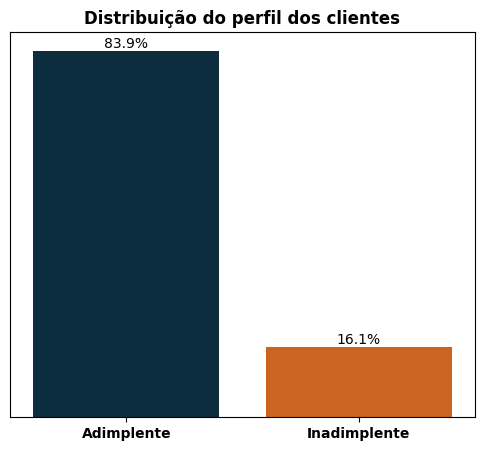

In [5]:
plt.figure(figsize=(6,5))

ax=sns.countplot(data=df, x='default', hue='default', legend=False)
ax.set_title('Distribuição do perfil dos clientes', fontweight='bold')
ax.grid=False
ax.set_xticks(range(2), ['Adimplente', 'Inadimplente'], fontweight='bold')
ax.set_xlabel('')
ax.legend=False
ax.yaxis.set_visible(False)


total = len(df)
counts = [count.get_height() for count in ax.patches]
percentages = [(count / total) * 100 for count in counts]

for count, percentage in zip(ax.patches, percentages):
    x = count.get_x() + count.get_width() / 2
    y = count.get_height()
    ax.annotate(f"{percentage:.1f}%", (x, y), ha='center', va='bottom')

plt.show()

A maior parte dos clientes são adimplentes, no entatnto, o intuito da avaliação é entender o perfil dos indivíduos inadimplentes e propor intervenções

In [6]:
qtd_total, _=df.shape
qtd_adimplentes, _=df[df['default']==0].shape
qtd_inadimplentes, _=df[df['default']==1].shape

# 2\. Correção dos dados

## 2.1 Corrigindo o tipos dos índices

In [7]:
df.dtypes

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

É possível observar que há uma incoerência nos dados representados nessa tabela.

Índices como 'limite_credito' e 'valor_transacoes_12m' estão sendo considerados como object (valor textual), enquanto deveriam ser um valor numérico.

In [8]:
df[['limite_credito', 'valor_transacoes_12m']].dtypes

limite_credito          object
valor_transacoes_12m    object
dtype: object

In [9]:
df[['limite_credito', 'valor_transacoes_12m']].head(5)

,limite_credito,valor_transacoes_12m
0,"12.691,51","1.144,90"
1,"8.256,96","1.291,45"
2,"3.418,56","1.887,72"
3,"3.313,03","1.171,56"
4,"4.716,22","816,08"


A função abaixo faz a correção dos valores de str para float.
A função retira o separador de indicador de milhar ' . ' e substitui o separador de decimal ' , ' por ' . ' , deixando no padrão da lingua inglesa

In [10]:
fn=lambda valor:float (valor.replace('.', '').replace(',', '.'))
valores_originais = ['12.691,51', '8.256,96', '3.418,56', '3.313,03', '4.716,22']
valores_limpos=list(map(fn, valores_originais))

print(valores_originais)
print(valores_limpos)


['12.691,51', '8.256,96', '3.418,56', '3.313,03', '4.716,22']
[12691.51, 8256.96, 3418.56, 3313.03, 4716.22]


Aplicamos a função nas duas colunas e observamos que agora todos os tópicos estão no tipo correto

In [11]:
df['limite_credito']=df['limite_credito'].apply(fn)

In [12]:
df['valor_transacoes_12m']=df['valor_transacoes_12m'].apply(fn)

In [13]:
df[['limite_credito', 'valor_transacoes_12m']].dtypes

limite_credito          float64
valor_transacoes_12m    float64
dtype: object

## 2.2 Procurando e removendo dados duplicados ou ausentes

In [14]:
df.loc[df.duplicated()]

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m


In [15]:
df.isna().any()

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

A função abaixo serve para identificar as colunas com dados ausentes, contabilizar a quantidade de dados e demonstrar qual a representativade dessse número de dados sore o documento completo em porcentagem

In [16]:
def stats_dados_faltantes(df: pd.DataFrame) -> None:
  stats_dados_faltantes = []
  for col in df.columns:
    if df[col].isna().any():
      qtd, _ = df[df[col].isna()].shape
      total, _= df.shape
      dict_dados_faltantes={col: {'quantidade': qtd, 'porcentagem': round(100*qtd/total,2)}}
      stats_dados_faltantes.append(dict_dados_faltantes)
  for stat in stats_dados_faltantes:
    print(stat)



O código abaixo identifica a proporção de dados nos índices 'escolaridade', 'estado_civil' e 'salario_anual'


In [17]:
stats_dados_faltantes(df=df)

{'escolaridade': {'quantidade': 1519, 'porcentagem': 15.0}}
{'estado_civil': {'quantidade': 749, 'porcentagem': 7.4}}
{'salario_anual': {'quantidade': 1112, 'porcentagem': 10.98}}


O código abaixo identifica a proporção de dados ausentes no grupo de indivíduos adimplentes



In [18]:
stats_dados_faltantes(df=df[df['default']==0])

{'escolaridade': {'quantidade': 1263, 'porcentagem': 14.86}}
{'estado_civil': {'quantidade': 620, 'porcentagem': 7.29}}
{'salario_anual': {'quantidade': 925, 'porcentagem': 10.88}}


O código abaixo identifica a proporção de dados ausentes no grupo de indivíduos indadimplentes



In [19]:
stats_dados_faltantes(df=df[df['default']==1])

{'escolaridade': {'quantidade': 256, 'porcentagem': 15.73}}
{'estado_civil': {'quantidade': 129, 'porcentagem': 7.93}}
{'salario_anual': {'quantidade': 187, 'porcentagem': 11.49}}


Uma vez que identificamos que a distribuição de dados ausentes é similar entre os dois grupos, ficamos livres para remover todas as linhas com informações ausentes, sem comprometer o resultado final

In [20]:
df.dropna(inplace=True)
df.shape

(7081, 16)

In [21]:
df[df['default']==0].shape


(5968, 16)

In [22]:
df[df['default']==1].shape

(1113, 16)

In [23]:
qtd_total_novo, _=df.shape
qtd_adimplentes_novo, _=df[df['default']==0].shape
qtd_inadimplentes_novo, _=df[df['default']==1].shape

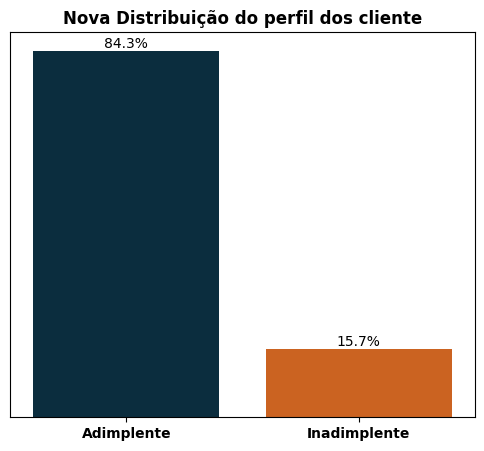

In [24]:
plt.figure(figsize=(6,5))

ax=sns.countplot(data=df, x='default', hue='default', legend=False)
ax.set_title('Nova Distribuição do perfil dos cliente', fontweight='bold')
ax.grid=False
ax.set_xticks(range(2), ['Adimplente', 'Inadimplente'], fontweight='bold')
ax.set_xlabel('')
ax.legend=False
ax.yaxis.set_visible(False)


total = len(df)
counts = [count.get_height() for count in ax.patches]
percentages = [(count / total) * 100 for count in counts]

for count, percentage in zip(ax.patches, percentages):
    x = count.get_x() + count.get_width() / 2
    y = count.get_height()
    ax.annotate(f"{percentage:.1f}%", (x, y), ha='center', va='bottom')

plt.show()

# 3\. Visualização dos dados

## 3.1 Descrição dos dados categóricos e numéricos



In [25]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,7081,2,M,3706
escolaridade,7081,5,mestrado,2591
estado_civil,7081,3,casado,3564
salario_anual,7081,5,menos que $40K,2792
tipo_cartao,7081,4,blue,6598


In [26]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,7081.0,0.157181,0.363997,0.00,0.00,0.00,0.00,1.00
idade,7081.0,46.347691,8.041225,26.00,41.00,46.00,52.00,73.00
dependentes,7081.0,2.337805,1.291649,0.00,1.00,2.00,3.00,5.00
meses_de_relacionamento,7081.0,35.981359,8.002609,13.00,31.00,36.00,40.00,56.00
qtd_produtos,7081.0,3.819376,1.544444,1.00,3.00,4.00,5.00,6.00
iteracoes_12m,7081.0,2.454456,1.104917,0.00,2.00,2.00,3.00,6.00
meses_inativo_12m,7081.0,2.342607,0.995104,0.00,2.00,2.00,3.00,6.00
limite_credito,7081.0,8493.259524,9126.082105,1438.00,2498.35,4287.22,10729.40,34516.99
valor_transacoes_12m,7081.0,4394.800669,3468.457771,510.16,2089.63,3831.09,4740.51,17995.49
qtd_transacoes_12m,7081.0,64.503319,23.809330,10.00,44.00,67.00,80.00,134.00


In [27]:
df.nunique()

id                         7081
default                       2
idade                        45
sexo                          2
dependentes                   6
escolaridade                  5
estado_civil                  3
salario_anual                 5
tipo_cartao                   4
meses_de_relacionamento      44
qtd_produtos                  6
iteracoes_12m                 7
meses_inativo_12m             7
limite_credito             6509
valor_transacoes_12m       7044
qtd_transacoes_12m          124
dtype: int64

## 3.2 Separação dos grupos

In [28]:
df_adimplentes=df[df['default']==0]

In [29]:
df_inadimplentes=df[df['default']==1]

Estatísticas dos dados dos clientes adimplentes

In [30]:
df_adimplentes.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,5968.0,0.000000,0.000000,0.00,0.0000,0.000,0.0000,0.00
idade,5968.0,46.317359,8.092984,26.00,41.0000,46.000,52.0000,73.00
dependentes,5968.0,2.331434,1.293032,0.00,1.0000,2.000,3.0000,5.00
meses_de_relacionamento,5968.0,35.949397,8.020490,13.00,31.0000,36.000,40.0000,56.00
qtd_produtos,5968.0,3.916555,1.515820,1.00,3.0000,4.000,5.0000,6.00
iteracoes_12m,5968.0,2.361930,1.085288,0.00,2.0000,2.000,3.0000,5.00
meses_inativo_12m,5968.0,2.276977,1.001688,0.00,2.0000,2.000,3.0000,6.00
limite_credito,5968.0,8555.587349,9116.518156,1438.01,2560.0975,4349.465,10853.6175,34516.99
valor_transacoes_12m,5968.0,4635.007929,3587.381325,816.08,2246.8975,4048.600,4775.8550,17995.49
qtd_transacoes_12m,5968.0,68.176441,23.318695,11.00,52.0000,70.000,82.0000,134.00


Estatísticas dos dados dos clientes inadimplentes

In [31]:
df_inadimplentes.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,1113.0,1.000000,0.000000,1.00,1.00,1.00,1.00,1.00
idade,1113.0,46.510332,7.759314,26.00,41.00,46.00,52.00,68.00
dependentes,1113.0,2.371968,1.284245,0.00,1.00,2.00,3.00,5.00
meses_de_relacionamento,1113.0,36.152740,7.907402,13.00,32.00,36.00,41.00,56.00
qtd_produtos,1113.0,3.298293,1.592182,1.00,2.00,3.00,5.00,6.00
iteracoes_12m,1113.0,2.950584,1.077184,0.00,2.00,3.00,4.00,6.00
meses_inativo_12m,1113.0,2.694519,0.879491,0.00,2.00,3.00,3.00,6.00
limite_credito,1113.0,8159.052462,9174.085337,1438.00,2053.06,4116.79,9943.21,34516.98
valor_transacoes_12m,1113.0,3106.789057,2359.711453,510.16,1867.49,2309.42,2811.91,10583.79
qtd_transacoes_12m,1113.0,44.807727,15.191963,10.00,37.00,43.00,51.00,91.00


## 3.3 Representação do conjunto de dados categóricos


In [32]:
df.drop(['sexo'], axis=1).select_dtypes('object').head(5)

,escolaridade,estado_civil,salario_anual,tipo_cartao
0,ensino medio,casado,$60K - $80K,blue
1,mestrado,solteiro,menos que $40K,blue
2,mestrado,casado,$80K - $120K,blue
4,sem educacao formal,casado,$60K - $80K,blue
5,mestrado,casado,$40K - $60K,blue


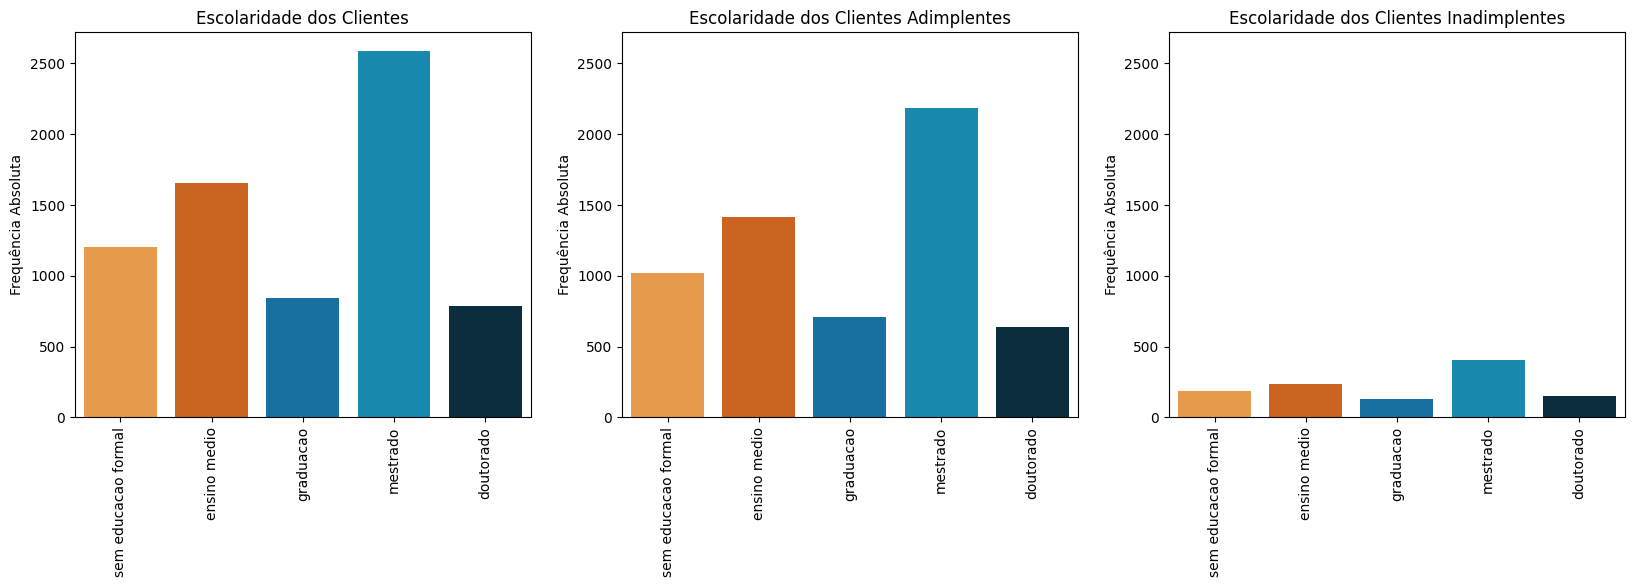

In [33]:

coluna = 'escolaridade'
titulos = ['Escolaridade dos Clientes', 'Escolaridade dos Clientes Adimplentes', 'Escolaridade dos Clientes Inadimplentes']

figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharex=True)
max_y = 0

categorias_escolaridade = ['sem educacao formal', 'ensino medio', 'graduacao', 'mestrado', 'doutorado']
df.loc[:, 'escolaridade'] = pd.Categorical(df['escolaridade'], categories=categorias_escolaridade, ordered=True)
df_adimplentes.loc[:, 'escolaridade'] = pd.Categorical(df_adimplentes['escolaridade'], categories=categorias_escolaridade, ordered=True)
df_inadimplentes.loc[:, 'escolaridade'] = pd.Categorical(df_inadimplentes['escolaridade'], categories=categorias_escolaridade, ordered=True)



for eixo, dataframe in enumerate([df, df_adimplentes, df_inadimplentes]):
  df_to_plot = dataframe[coluna].value_counts().reset_index()
  df_to_plot.columns = [coluna, 'frequencia_absoluta']
  df_to_plot.sort_values(by=[coluna], inplace=True)

  f = sns.barplot(data=df_to_plot, x=coluna, y='frequencia_absoluta', ax=eixos[eixo], hue='escolaridade', legend=False, order=categorias_escolaridade)
  f.set(title=titulos[eixo], xlabel=None, ylabel='Frequência Absoluta')
  f.set_xticks(range(len(f.get_xticklabels())))
  f.set_xticklabels(labels=[tick.get_text() for tick in f.get_xticklabels()], rotation=90)

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y

for eixo in eixos:
  eixo.set(ylim=(0, max_y))

plt.show()

Apesar de pouco determinante, é possível observar que existem mais indivíduos inadimplentes com o grau de escolaridade 'doutorado' do que os com grau de 'graduacao', o que não ocorre nos indivíduos adimplentes.

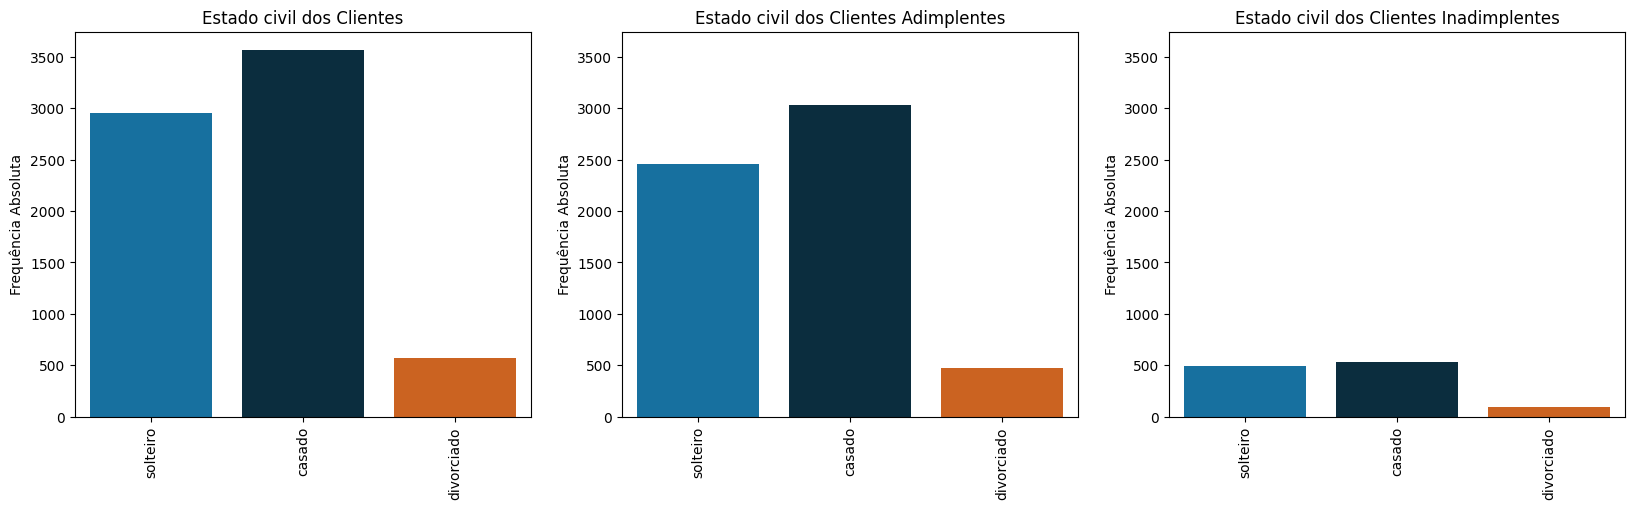

In [52]:
coluna = 'estado_civil'
titulos = ['Estado civil dos Clientes', 'Estado civil dos Clientes Adimplentes', 'Estado civil dos Clientes Inadimplentes']

figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharex=True)
max_y = 0


categorias_estado_civil = ['solteiro', 'casado', 'divorciado']
df.loc[:, 'estado_civil'] = pd.Categorical(df['estado_civil'], categories=categorias_estado_civil, ordered=True)
df_adimplentes.loc[:, 'estado_civil'] = pd.Categorical(df_adimplentes['estado_civil'], categories=categorias_estado_civil, ordered=True)
df_inadimplentes.loc[:, 'estado_civil'] = pd.Categorical(df_inadimplentes['estado_civil'], categories=categorias_estado_civil, ordered=True)


for eixo, dataframe in enumerate([df, df_adimplentes, df_inadimplentes]):
  df_to_plot = dataframe[coluna].value_counts().reset_index()
  df_to_plot.columns = [coluna, 'frequencia_absoluta']
  df_to_plot.sort_values(by=[coluna], inplace=True)

  f = sns.barplot(data=df_to_plot, x=coluna, y='frequencia_absoluta', ax=eixos[eixo], hue='estado_civil', legend=False, order=categorias_estado_civil)
  f.set(title=titulos[eixo], xlabel=None, ylabel='Frequência Absoluta')
  f.set_xticks(range(len(f.get_xticklabels())))
  f.set_xticklabels(labels=[tick.get_text() for tick in f.get_xticklabels()], rotation=90)

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y

for eixo in eixos:
  eixo.set(ylim=(0, max_y))

plt.show()

Aparentemente, indivíduos casados e solteiros têm incidência de inadimplência similares

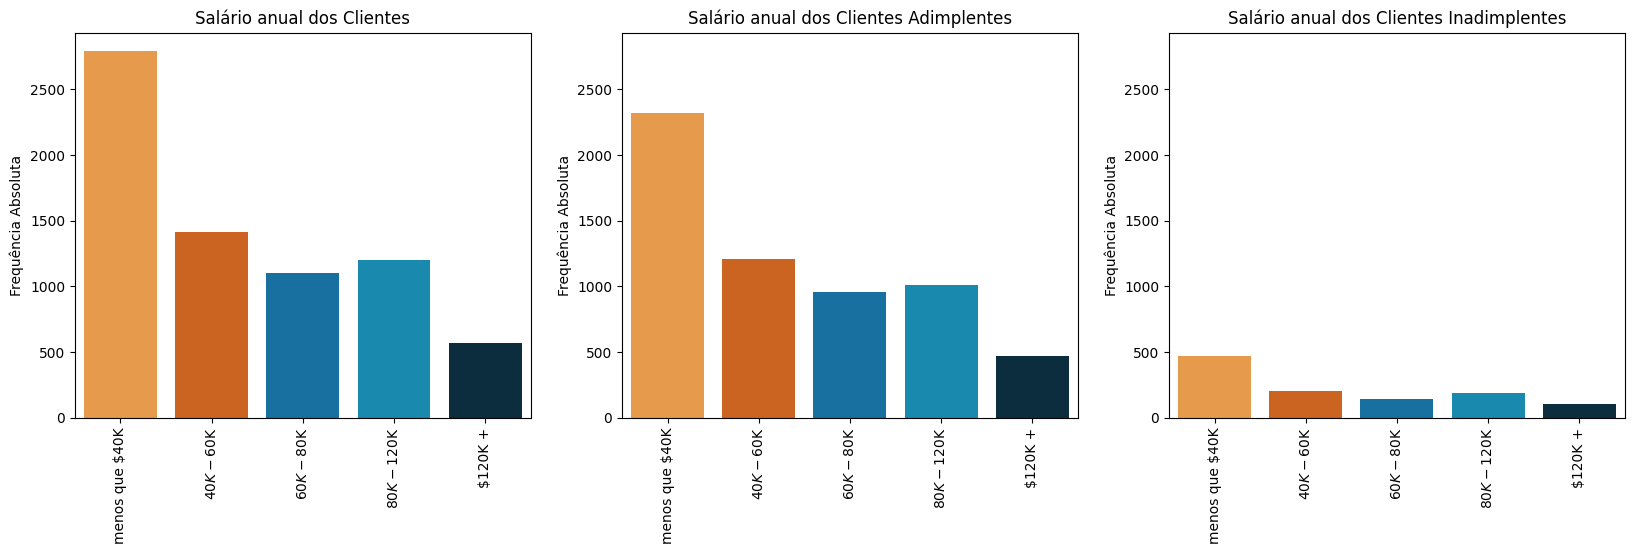

In [53]:
coluna = 'salario_anual'
titulos = ['Salário anual dos Clientes', 'Salário anual dos Clientes Adimplentes', 'Salário anual dos Clientes Inadimplentes']

figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharex=True)
max_y = 0

categorias_salario_anual = ['menos que $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +']
df.loc[:, 'salario_anual'] = pd.Categorical(df['salario_anual'], categories=categorias_salario_anual, ordered=True)
df_adimplentes.loc[:, 'salario_anual'] = pd.Categorical(df_adimplentes['salario_anual'], categories=categorias_salario_anual, ordered=True)
df_inadimplentes.loc[:, 'salario_anual'] = pd.Categorical(df_inadimplentes['salario_anual'], categories=categorias_salario_anual, ordered=True)

for eixo, dataframe in enumerate([df, df_adimplentes, df_inadimplentes]):
  df_to_plot = dataframe[coluna].value_counts().reset_index()
  df_to_plot.columns = [coluna, 'frequencia_absoluta']
  df_to_plot.sort_values(by=[coluna], inplace=True)

  f = sns.barplot(data=df_to_plot, x=coluna, y='frequencia_absoluta', ax=eixos[eixo], hue='salario_anual', legend=False, order=categorias_salario_anual)
  f.set(title=titulos[eixo], xlabel=None, ylabel='Frequência Absoluta')
  f.set_xticks(range(len(f.get_xticklabels())))
  f.set_xticklabels(labels=[tick.get_text() for tick in f.get_xticklabels()], rotation=90)

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y

for eixo in eixos:
  eixo.set(ylim=(0, max_y))

plt.show()

A faixa salarial não parece ser determinante para a análise do perfil dos clientes

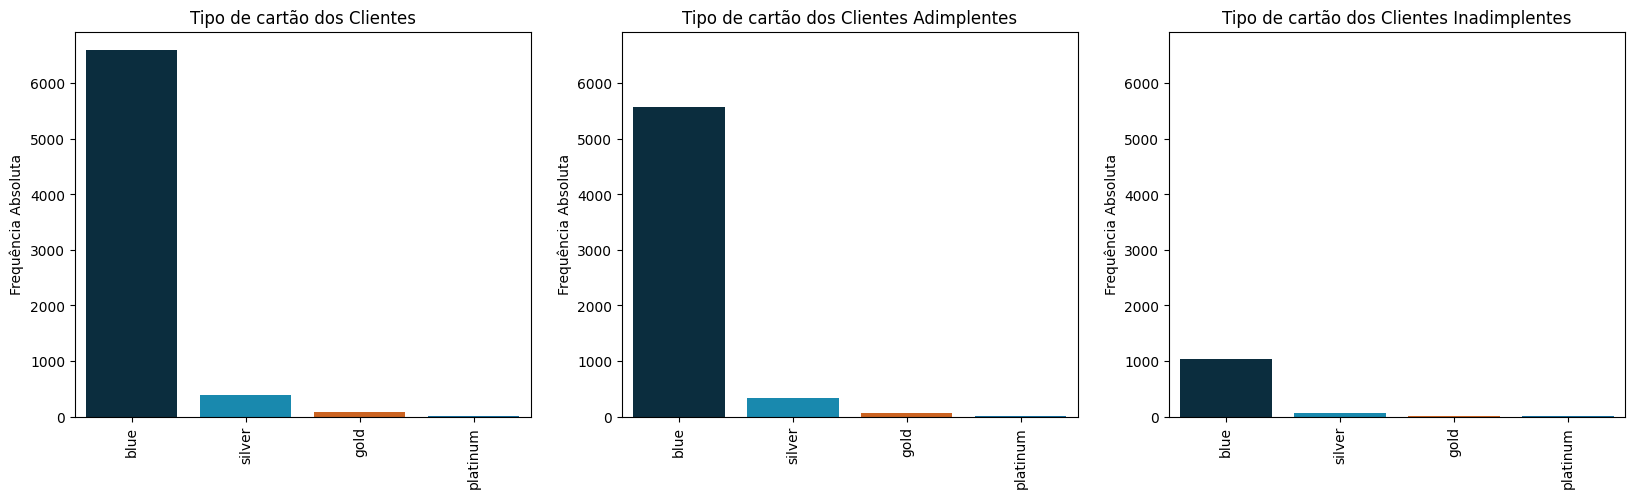

In [54]:

coluna = 'tipo_cartao'
titulos = ['Tipo de cartão dos Clientes', 'Tipo de cartão dos Clientes Adimplentes', 'Tipo de cartão dos Clientes Inadimplentes']

figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharex=True)
max_y = 0

categorias_cartao = ['blue', 'silver', 'gold', 'platinum']
df.loc[:, 'tipo_cartao'] = pd.Categorical(df['tipo_cartao'], categories=categorias_cartao, ordered=True)
df_adimplentes.loc[:, 'tipo_cartao'] = pd.Categorical(df_adimplentes['tipo_cartao'], categories=categorias_cartao, ordered=True)
df_inadimplentes.loc[:, 'tipo_cartao'] = pd.Categorical(df_inadimplentes['tipo_cartao'], categories=categorias_cartao, ordered=True)

for eixo, dataframe in enumerate([df, df_adimplentes, df_inadimplentes]):
  df_to_plot = dataframe[coluna].value_counts().reset_index()
  df_to_plot.columns = [coluna, 'frequencia_absoluta']
  df_to_plot.sort_values(by=[coluna], inplace=True)

  f = sns.barplot(data=df_to_plot, x=coluna, y='frequencia_absoluta', ax=eixos[eixo], hue='tipo_cartao', legend=False, order=categorias_cartao)
  f.set(title=titulos[eixo], xlabel=None, ylabel='Frequência Absoluta')
  f.set_xticks(range(len(f.get_xticklabels())))
  f.set_xticklabels(labels=[tick.get_text() for tick in f.get_xticklabels()], rotation=90)

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y

for eixo in eixos:
  eixo.set(ylim=(0, max_y))

plt.show()

Clientes com o cartão 'gold' e 'platinum' têm uma chance muito baixa de serem inadimplentes

## 3.3 Representação do conjunto de dados numéricos


In [37]:
df.drop(['id', 'default'], axis=1).select_dtypes('number').head(1)

,idade,dependentes,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,45,3,39,5,3,1,12691.51,1144.9,42


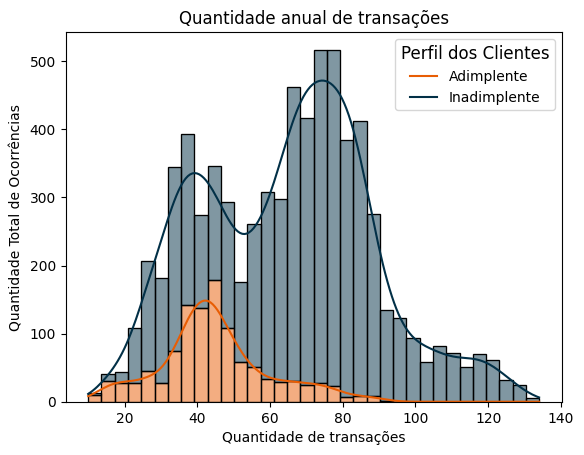

In [38]:
f=sns.histplot(x='qtd_transacoes_12m', data=df, stat='count', ax=None, hue='default', multiple='stack', kde=True)
legend=f.legend(title='Perfil dos Clientes', labels=['Adimplente', 'Inadimplente'])
plt.setp(legend.get_title(), fontsize='12')
legend.legend_handles[0]._sizes = [1]
legend.legend_handles[1]._sizes = [1]
plt.title('Quantidade anual de transações')
plt.xlabel('Quantidade de transações')
plt.ylabel('Quantidade Total de Ocorrências')
plt.show()

Os clientes inadimplentes têm em comum o fato de realizarem uma média de 44 transações no ano, enquanto os adimplentes fazem em médis 68 transações. A incidência de inadimplência é próxima de 0 em clientes que fazem mais de 100 transações no ano.



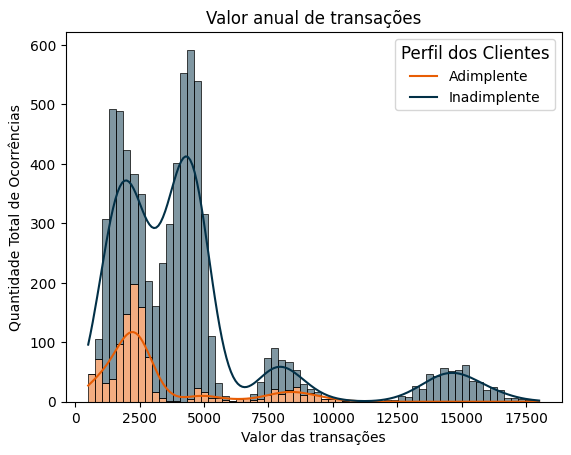

In [39]:
figsize=(10,5)
f=sns.histplot(x='valor_transacoes_12m', data=df, stat='count', ax=None, hue='default', multiple='stack', kde=True)
legend=f.legend(title='Perfil dos Clientes', labels=['Adimplente', 'Inadimplente'])
plt.setp(legend.get_title(), fontsize='12')
legend.legend_handles[0]._sizes = [1]
legend.legend_handles[1]._sizes = [1]
plt.title('Valor anual de transações')
plt.xlabel('Valor das transações')
plt.ylabel('Quantidade Total de Ocorrências')
plt.show()

A maioria dos clientes inadimplentes costumam fazer transações próximas de 2.500 com média de aproximadamente 3.106 enquanto que os clientes adimplentes apresentam 2 picos no valor de transações anual, sendo próximo de 2.500 e 5.000. A incidência de inadimplência é próximo de 0 para clientes com valor de transações acima de 100.000

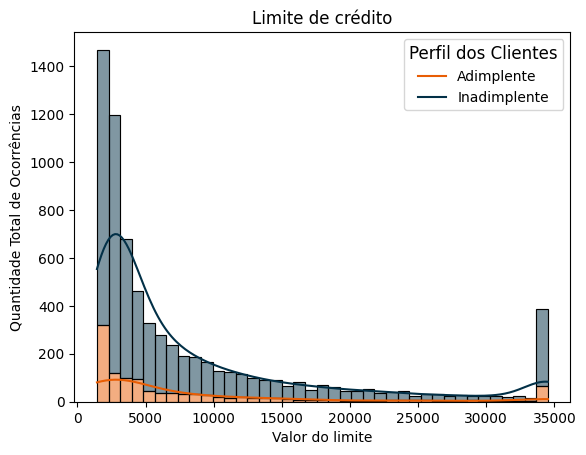

In [40]:
f=sns.histplot(x='limite_credito', data=df, stat='count', ax=None, hue='default', multiple='stack', kde=True)
legend=f.legend(title='Perfil dos Clientes', labels=['Adimplente', 'Inadimplente'])
legend=f.legend(title='Perfil dos Clientes', labels=['Adimplente', 'Inadimplente'])
plt.setp(legend.get_title(), fontsize='12')
legend.legend_handles[0]._sizes = [1]
legend.legend_handles[1]._sizes = [1]
plt.title('Limite de crédito')
plt.xlabel('Valor do limite')
plt.ylabel('Quantidade Total de Ocorrências')
plt.show()

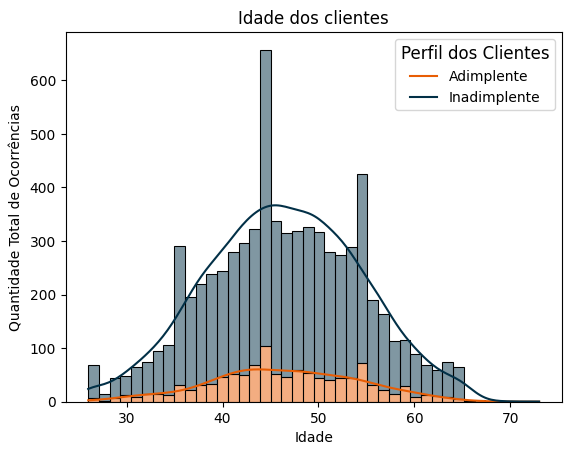

In [41]:
f=sns.histplot(x='idade', data=df, stat='count', ax=None, hue='default', multiple='stack', kde=True)
legend=f.legend(title='Perfil dos Clientes', labels=['Adimplente', 'Inadimplente'])
legend=f.legend(title='Perfil dos Clientes', labels=['Adimplente', 'Inadimplente'])
plt.setp(legend.get_title(), fontsize='12')
legend.legend_handles[0]._sizes = [1]
legend.legend_handles[1]._sizes = [1]
plt.title('Idade dos clientes')
plt.xlabel('Idade')
plt.ylabel('Quantidade Total de Ocorrências')
plt.show()

In [42]:
def categorizar_idade(idade):
    if 18 <= idade <= 39:
        return 'jovem_adulto'
    elif 40 <= idade <= 59:
        return 'adulto'
    elif idade >= 60:
        return 'idoso'
    else:
        return 'fora_da_faixa'

df['faixa_etaria'] = df['idade'].apply(categorizar_idade)



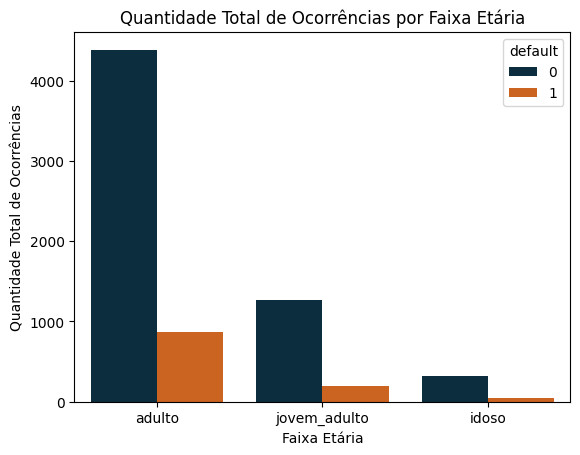

In [43]:
sns.countplot(data=df, x='faixa_etaria', hue='default')

#legend=f.legend(title='Perfil dos Clientes', labels=['Adimplente', 'Inadimplente'])
#plt.setp(legend.get_title(), fontsize='12')
#legend.legend_handles[0]._sizes = [1]
#legend.legend_handles[1]._sizes = [1]

plt.title('Quantidade Total de Ocorrências por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Quantidade Total de Ocorrências')
plt.show()

In [44]:
#f=sns.histplot(x='dependentes', data=df, stat='count', ax=None, hue='default', multiple='stack', palette='deep')

In [45]:
#f=sns.histplot(x='meses_de_relacionamento', data=df, stat='count', ax=None, hue='default', multiple='stack', palette='deep')

In [46]:
#f=sns.histplot(x='qtd_produtos', data=df, stat='count', ax=None, hue='default', multiple='stack', palette='deep')

In [47]:
#f=sns.histplot(x='iteracoes_12m', data=df, stat='count', ax=None, hue='default', multiple='stack', palette='deep')

In [48]:
#f=sns.histplot(x='meses_inativo_12m', data=df, stat='count', ax=None, hue='default', multiple='stack', palette='deep')

In [49]:
df.drop(['id','default'], axis=1).select_dtypes('number').corr()

,idade,dependentes,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
idade,1.000000,-0.128232,0.791271,-0.022067,-0.023971,0.057870,0.024563,-0.045859,-0.069883
dependentes,-0.128232,1.000000,-0.112368,-0.043257,-0.055625,-0.022804,0.081378,0.023234,0.057056
meses_de_relacionamento,0.791271,-0.112368,1.000000,-0.016751,-0.011054,0.071305,0.020103,-0.037625,-0.050445
qtd_produtos,-0.022067,-0.043257,-0.016751,1.000000,0.070539,0.005072,-0.074876,-0.348024,-0.246749
iteracoes_12m,-0.023971,-0.055625,-0.011054,0.070539,1.000000,0.026269,0.016737,-0.121018,-0.155612
meses_inativo_12m,0.057870,-0.022804,0.071305,0.005072,0.026269,1.000000,-0.015728,-0.039977,-0.048169
limite_credito,0.024563,0.081378,0.020103,-0.074876,0.016737,-0.015728,1.000000,0.171592,0.080834
valor_transacoes_12m,-0.045859,0.023234,-0.037625,-0.348024,-0.121018,-0.039977,0.171592,1.000000,0.810074
qtd_transacoes_12m,-0.069883,0.057056,-0.050445,-0.246749,-0.155612,-0.048169,0.080834,0.810074,1.000000


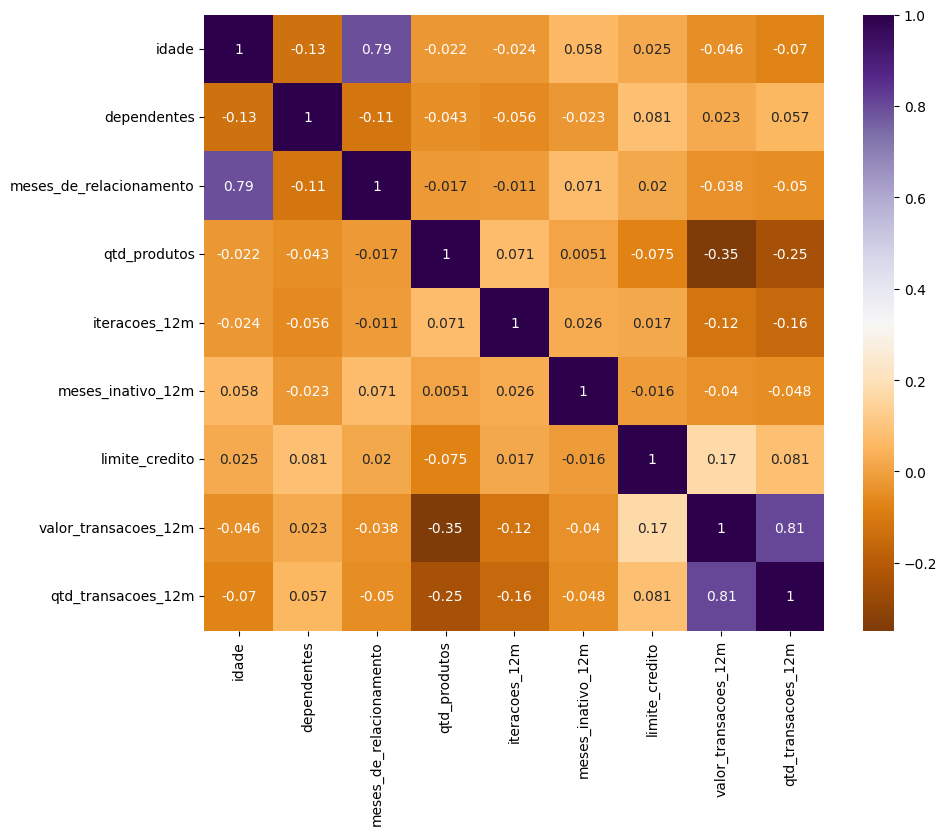

In [50]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.drop(['id','default'], axis=1).select_dtypes('number').corr(), cmap='PuOr', annot=True)
plt.show()

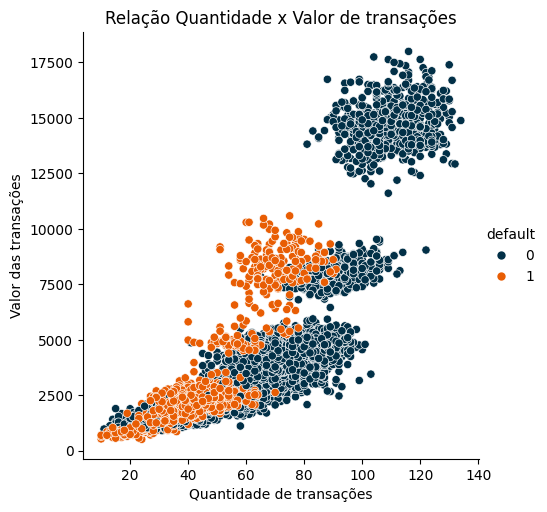

In [51]:
sns.relplot(data=df, x='qtd_transacoes_12m', y='valor_transacoes_12m', hue='default')
legend=f.legend(title='Perfil dos Clientes', labels=['Adimplente', 'Inadimplente'])
plt.setp(legend.get_title(), fontsize='12')
legend.legend_handles[0]._sizes = [1]
legend.legend_handles[1]._sizes = [1]
plt.title('Relação Quantidade x Valor de transações')
plt.xlabel('Quantidade de transações')
plt.ylabel('Valor das transações')
plt.show()

A quantidade de transações e o valor das transações têm uma correlação positiva forte.



# 4\. Conclusão

Essa análise foi conduzida com o intuito de avaliar o perfil dos clientes do banco e identificar pontos em comum entre os clientes inadimplentes

#População:


*   a maior parte dos clientes é do sexo masculino;
*   A maior parte dos clientes têm o grau de escolaridade em nível de mestrado;
*   A média de idade dos clientes é de 46 anos;
*   A maior parte dos clientes são casados;
*   A média de dependentes por cliente é de 3

#Financeiro:


*   A maioria dos clientes possui o cartão blue
*   A maioria dos clientes recebe menos que 40 mil por ano
*   A média de dependentes por cliente é de 3
*   O valor médio de transação no últmo ano é de R$ 4394,80
*   O número médio de transações dos clientes é de 64,5

#Análise de perfil:


*   Clientes com os cartões blue e silver apresentam maior chance de serem inadimplentes
*   Clientes inadimplentes apresentam uma média de 44 transações no ano. Quanto maior o número de transações, menor a chance de inadimplência. Clientes acima de 100 transações não apresentam inadimplência
*   O valor médio das transações dos clientes inadimplentes é de 3.106. Quanto maior o valor das transações anuais, menor a chance de inadimplência. Clientes com transações acima de 125.000 reais não apresentam inadimplência
*   A quantidade de transações e o valor das transações possuem uma correlação positiva forte





